# Exoplanet Hunting in Deep Space

### Kepler labelled time series data

### Table of Contents

1. [Introduction](#introduction)
    1. [Abstract](#abstract)
    2. [Data Description](#description)
2. [Fetching Data](#fetching) 
3. [EDA](#eda)
4. [Time Series Visualization](#visualization)
5. [Supervised Learning](#supervised)
    1. [Bagging Classifier](#bagging)
    2. [Bagging Classifier. SMOTE](#bagging_smote)
    3. [Random Forest](#random_forest)
    4. [UMAP & SMOTE Visualization](#smote_vis)   
    5. [tsfresh](#tsfresh)
    6. [Undersampling](#Undersampling)
    7. [XGBoost](#XGBoost)
    8. [Logistic Regression](#log_reg)
6. [Unsupervised Learning](#unsupervised)
    1. [IsolationForest](#isolation)
    2. [One-class SVM](#svm)
    3. [Local Outlier Factor](#lof)      
7. [Testing](#testing)
8. [Conclusion](#conclusion)

<a id='introduction'></a>

## 1. Introduction

<a id='abstract'></a>

### Abstract

In the notebook [Exoplanet Hunting dataset](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) is used.  
Best result was achieved by applying tsfresh to dataset.<br/><br/>
Result metrics table:

|model| ROC AUC|     F1|      TN|   FN|   TP|     FP|
| --- | --- | --- | --- | --- | --- | --- |
|bagging_tree_500                         |  0.500 | 0.000 | 1011.0 | 7.0 | 0.0|  0.0 |
|bagging_tree_500_smote                   |  0.635 | 0.167 |  996.0 | 5.0 | 2.0|  15.0| 
|random_forest_500_10_smote               |  0.499 | 0.000 | 1009.0 | 7.0 | 0.0|  2.0 | 
|bagging_tree_500_fresh                   |  0.938 | 0.933 | 1010.0 | 1.0 | 7.0|  0.0 | 
|bagging_tree_500_smote_fresh             |  0.938 | 0.933 | 1010.0 | 1.0 | 7.0|  0.0 |
|bagging_tree_500_fresh_filtered          |  0.938 | 0.933 | 1010.0 | 1.0 | 7.0|  0.0 |
|bagging_tree_500_smote_fresh_filtered    |  0.938 | 0.933 | 1010.0 | 1.0 | 7.0|  0.0 |
|random_forest_500_10_smote_under         |  0.500 | 0.000 | 1010.0 | 7.0 | 0.0|  1.0 |
|bagging_tree_500_smote_under             |  0.570 | 0.182 | 1008.0 | 6.0 | 1.0|  3.0 |
|xgboost_500_0.2_smote                    |  0.500 | 0.000 | 1010.0 | 7.0 | 0.0|  1.0 |
|xgboost_500_0.2_fresh_filtered           |  0.497 | 0.000 | 1005.0 | 7.0 | 0.0|  6.0 |
|baseline_class_weights_balanced          |  0.567 | 0.018 |  569.0 | 3.0 | 4.0|  442.0| 
|logreg_cv_balanced                       |  0.821 | 0.116 |  937.0 | 2.0 | 5.0|  74.0 |
|logreg_cv_smote_balanced                 |  0.765 | 0.154 |  970.0 | 3.0 | 4.0|  41.0 |
|logreg_cv_liblinear_balanced             |  0.574 | 0.018 |  582.0 | 3.0 | 4.0|  429.0 |
|logreg_cv_liblinear_smote_balanced       |  0.739 | 0.075 |  916.0 | 3.0 | 4.0|  95.0 |
|logreg_cv_newton-cg_l2_balanced          |  0.769 | 0.178 |  977.0 | 3.0 | 4.0|  34.0 |
|logreg_cv_smote_newton-cg_l2_none        |  0.770 | 0.186 |  979.0 | 3.0 | 4.0|  32.0 |
|isolation_forest_500                     |  0.553 | 0.044 |  974.0 | 6.0 | 1.0|  37.0 |
|onesvm                                   |  0.790 | 0.032 |  587.0 | 0.0 | 7.0|  424.0 |
|onesvm_poly                              |  0.503 | 0.014 |  294.0 | 2.0 | 5.0|  717.0 |
|onesvm_linear                            |  0.556 | 0.017 |  547.0 | 3.0 | 4.0|  464.0 |
|onesvm_sigmoid                           |  0.500 | 0.000 | 1010.0 | 7.0 | 0.0|  1.0  |
|onesvm_rbf_scale                         |  0.568 | 0.133 | 1004.0 | 6.0 | 1.0|  7.0 |
|onesvm_rbf_smote                         |  0.822 | 0.038 |  652.0 | 0.0 | 7.0|  359.0| 
|lof                                      |  0.568 | 0.133 | 1004.0 | 6.0 | 1.0|  7.0 |
|bagging_tree_500_fresh_filtered_testing  |  0.800 | 0.750 |  565.0 | 2.0 | 3.0|  0.0 |
|logreg_cv_balanced_testing               |  0.658 | 0.074 |  518.0 | 3.0 | 2.0|  47.0 |
|onesvm_testing                           |  0.667 | 0.029 |  302.0 | 1.0 | 4.0|  263.0 |                    

<a id='description'></a>

### Data Description

[**The Search for New Earths**](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data/)

The Mission (https://github.com/winterdelta/KeplerAI)
Kepler is a NASA satellite-telescope designed to search for exoplanets. It is currently in its K2 phase. From an operational perspective, Kepler conducts campaigns. During a campaign, its camera focuses on one area of space and observes the same region for around 80 days.

Kepler is very sensitive to changes in flux (light intensity). Periodically, data are beamed down to Earth and after a bit of de-noising, they are open-sourced via the Mikulski Archive.



The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.


Acknowledgements
The data presented here are cleaned and are derived from observations made by the NASA Kepler space telescope. Over 99% of this dataset originates from Campaign 3. To boost the number of exoplanet-stars in the dataset, confirmed exoplanets from other campaigns were also included.

The datasets were prepared late-summer 2016.

**Trainset**:
5087 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.<br/><br/>
**Testset**:
570 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

<a id='fetching'></a>

## 2. Fetching Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score, confusion_matrix,\
accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

import pandas as pd
import seaborn as sn

from mpl_toolkits.mplot3d import Axes3D 
import umap
import xgboost as xgb

In [2]:
data = pd.read_csv('exoTrain.csv')

In [3]:
data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


<a id='eda'></a>

## 3. EDA

In [4]:
data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [5]:
data.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [6]:
data.shape

(5087, 3198)

In [7]:
data.isna().any().sum()

0

In [8]:
# for convenience
data['LABEL'] = data['LABEL'].replace(1, 0)
data['LABEL'] = data['LABEL'].replace(2, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F6B52EB08>,
      dtype=object)

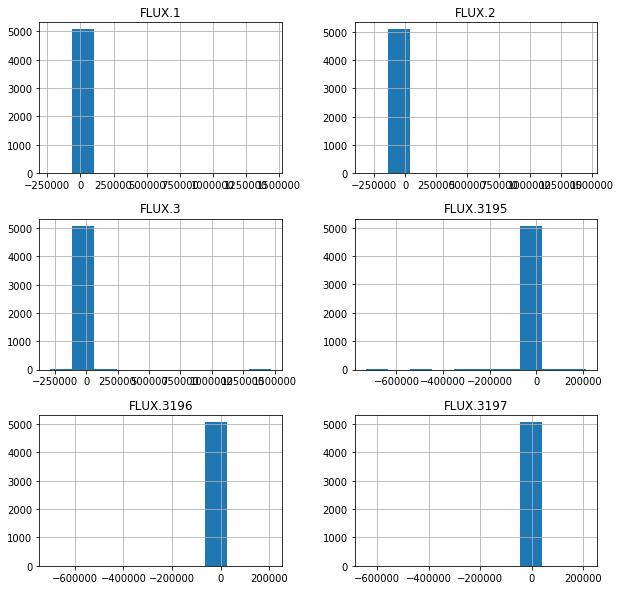

In [9]:
data.hist(column=['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'], figsize=(10, 10))

In [10]:
X = data.drop(columns='LABEL')
y =data['LABEL']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [12]:
y_train.value_counts()

0    4039
1      30
Name: LABEL, dtype: int64

In [13]:
y_test.value_counts()

0    1011
1       7
Name: LABEL, dtype: int64

<a id='visualization'></a>

### 4. Time Series Visualization

In [14]:
data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


Let's visualize exoplanet-stars flux. We can see that dispersion is rather big. 

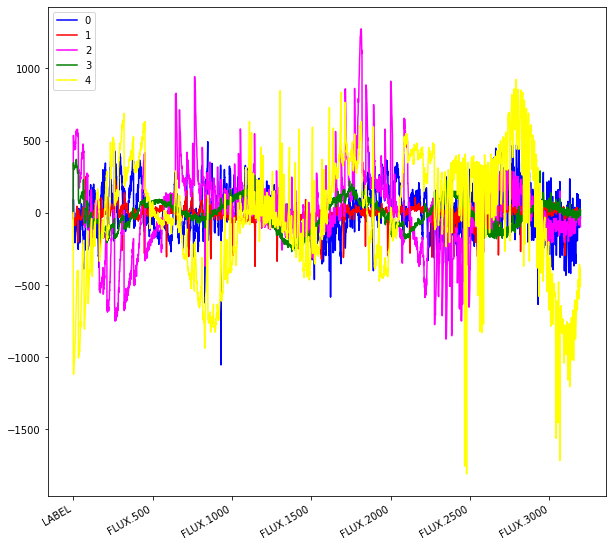

In [15]:
data.iloc[0].plot(subplots=True, sharex=True, figsize=(10,10), label = '0', color = 'blue')
data.iloc[1].plot(subplots=True, sharex=True, figsize=(10,10), label = '1', color = 'red')
data.iloc[2].plot(subplots=True, sharex=True, figsize=(10,10), label = '2', color = 'magenta')
data.iloc[3].plot(subplots=True, sharex=True, figsize=(10,10), label = '3', color='green')
data.iloc[4].plot(subplots=True, sharex=True, figsize=(10,10), label = '4', color = 'yellow')
plt.legend(loc='upper left')
plt.show()

In [16]:
data[data.LABEL == 0].head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
37,0,-141.22,-81.79,-52.28,-32.45,-1.55,-35.61,-23.28,19.45,53.11,...,-50.79,-22.34,-36.23,27.44,13.52,38.66,-17.53,31.49,31.38,50.03
38,0,-35.62,-28.55,-27.29,-28.94,-15.13,-51.06,2.67,-5.21,9.67,...,-43.98,-38.22,-46.23,-54.40,-23.51,-26.96,-3.95,-0.34,10.52,-7.69
39,0,142.40,137.03,93.65,105.64,98.22,99.06,86.40,60.78,45.18,...,-0.99,-3.03,-30.27,-24.22,-35.10,-39.64,23.78,23.40,-0.50,0.97
40,0,-167.02,-137.65,-150.05,-136.85,-98.73,-103.14,-107.70,-123.19,-125.65,...,-97.43,-79.79,-80.62,-78.22,-105.06,-69.67,-90.45,-73.67,-66.71,-66.07
41,0,207.74,223.60,246.15,224.06,210.77,189.56,172.68,170.31,148.79,...,-53.06,-136.92,-174.97,-180.46,-164.01,-126.58,84.05,63.81,108.36,78.10


Let's visualize non-exoplanet-stars flux. We can see that dispersion is lower than for exoplanet-stars. 

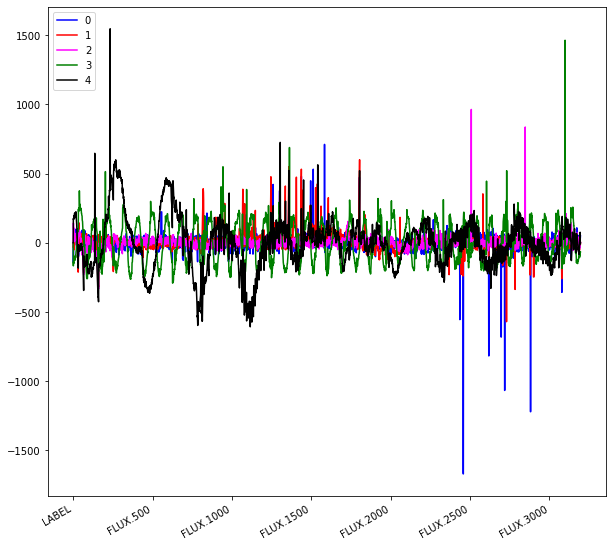

In [17]:
data.iloc[37].plot(subplots=True, sharex=True, figsize=(10,10), label = '0', color = 'blue')
data.iloc[38].plot(subplots=True, sharex=True, figsize=(10,10), label = '1', color = 'red')
data.iloc[39].plot(subplots=True, sharex=True, figsize=(10,10), label = '2', color = 'magenta')
data.iloc[40].plot(subplots=True, sharex=True, figsize=(10,10), label = '3', color='green')
data.iloc[42].plot(subplots=True, sharex=True, figsize=(10,10), label = '4', color = 'black')
plt.legend(loc='upper left')
plt.show()

In [18]:
def quality_report(prediction, actual, verbose=True):       
    f1 = f1_score(actual, prediction)  
    roc_auc = roc_auc_score(actual, prediction)
    confusion = confusion_matrix(actual, prediction)
    tn = confusion[0,0]
    fn = confusion[1,0]
    tp = confusion[1,1]
    fp = confusion[0,1]
    
    quality_list = [roc_auc, f1, tn, fn, tp, fp]
    
    if verbose:
        report_str = "ROC AUC: \t {:.3f}\n" +\
                "f1_score: \t {:.3f}\n" +\
                "TN: \t {:.3f}\n" +\
                "FN: \t {:.3f}\n" +\
                "TP: \t {:.3f}\n" +\
                "FP: \t {:.3f}\n"
        print("\n=== Quality Report ===")
        print(report_str.format(roc_auc, f1, tn, fn, tp, fp))
        print("======================\n")
    
    return quality_list

<a id='supervised'></a>

## 5. Supervised Learning

<a id='bagging'></a>

### Bagging Classifier

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

quality_list_baseline = quality_report(y_pred, y_test)
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["ROC AUC", "F1", "TN", "FN", "TP", "FP"],
    index=["bagging_tree_500"]
)
df_quality.round(3)


=== Quality Report ===
ROC AUC: 	 0.500
f1_score: 	 0.000
TN: 	 1011.000
FN: 	 7.000
TP: 	 0.000
FP: 	 0.000




,ROC AUC,F1,TN,FN,TP,FP
bagging_tree_500,0.5,0.0,1011,7,0,0


**Because of class disbalance no one exoplanet-star was found.**

<a id='bagging_smote'></a>

### Bagging Classifier. SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen.

In [20]:
os = SMOTE(random_state=42)
X_train_smote, y_train_smote = os.fit_sample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((8078, 3197), (8078,))

In [21]:
y_train_smote.value_counts()

1    4039
0    4039
Name: LABEL, dtype: int64

In [22]:
bag_clf_smote = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_smote.fit(X_train_smote, y_train_smote)
y_pred = bag_clf_smote.predict(X_test)

quality_list_smote = quality_report(y_pred, y_test)
df_quality.loc["bagging_tree_500_smote", :] = quality_list_smote
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.635
f1_score: 	 0.167
TN: 	 996.000
FN: 	 5.000
TP: 	 2.000
FP: 	 15.000


                        ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500          0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote    0.635  0.167   996.0  5.0  2.0  15.0


<a id='random_forest'></a>

### Random Forest

In [23]:
rfc_smote = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rfc_smote.fit(X_train_smote, y_train_smote)
y_pred = rfc_smote.predict(X_test)
quality_list_smote = quality_report(y_pred, y_test)
df_quality.loc["random_forest_500_10_smote", :] = quality_list_smote
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.499
f1_score: 	 0.000
TN: 	 1009.000
FN: 	 7.000
TP: 	 0.000
FP: 	 2.000


                            ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500              0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote        0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote    0.499  0.000  1009.0  7.0  0.0   2.0


<a id='smote_vis'></a>

### UMAP & SMOTE Visualization

In [24]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X_train)

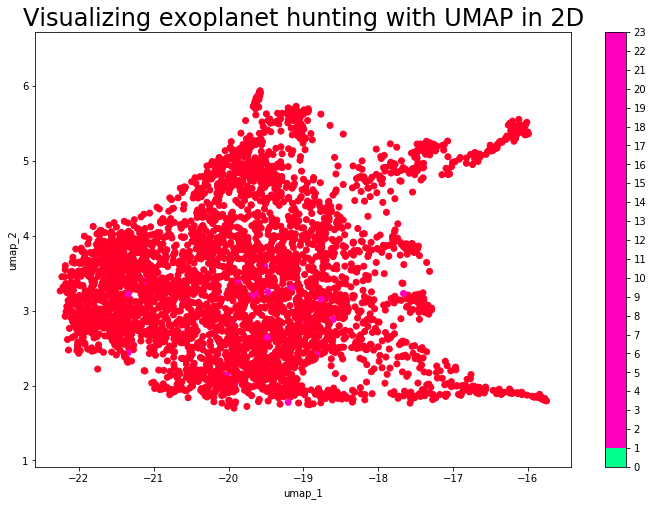

In [25]:
# Visualising UMAP in 2d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=y_train, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
plt.title('Visualizing exoplanet hunting with UMAP in 2D', fontsize=24);

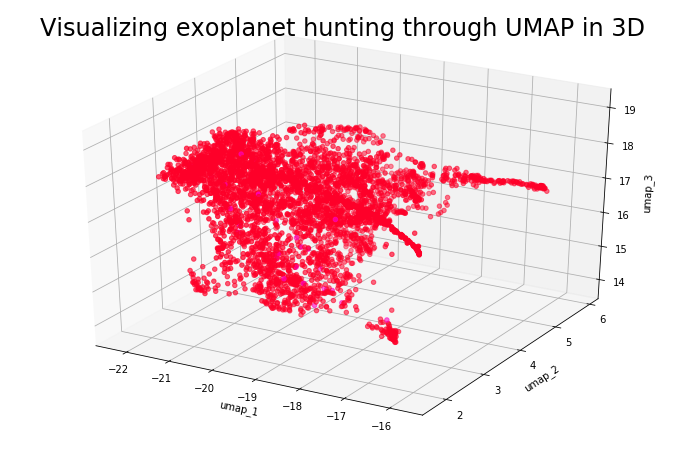

In [26]:
# Visualising UMAP in 3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],reducer.embedding_[:, 2], c=y_train, cmap='gist_rainbow')
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
ax.set_zlabel('umap_3')
plt.title('Visualizing exoplanet hunting through UMAP in 3D', fontsize=24);
plt.show()

### SMOTE applied

In [27]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X_train_smote)

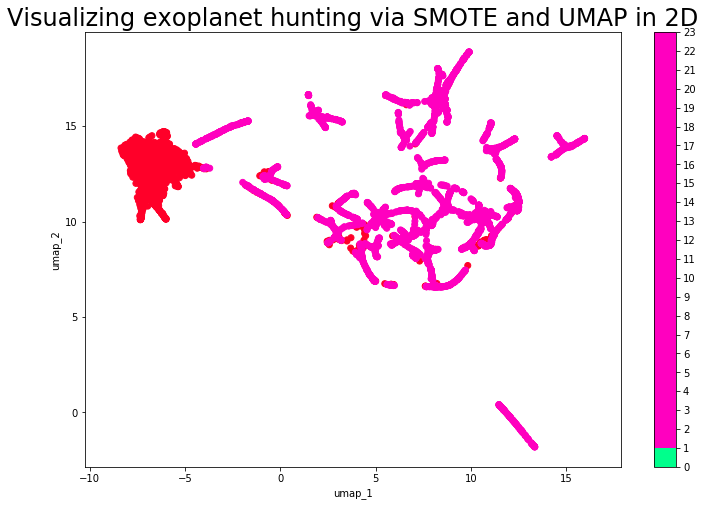

In [28]:
# Visualising UMAP in 2d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=y_train_smote, cmap='gist_rainbow')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(24)).set_ticks(np.arange(24))
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
plt.title('Visualizing exoplanet hunting via SMOTE and UMAP in 2D', fontsize=24);

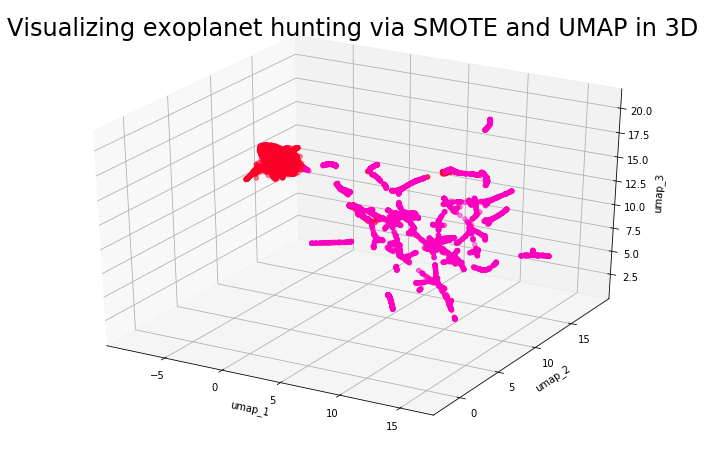

In [29]:
# Visualising UMAP in 3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],reducer.embedding_[:, 2], c=y_train_smote, cmap='gist_rainbow')
ax.set_xlabel('umap_1')
ax.set_ylabel('umap_2')
ax.set_zlabel('umap_3')
plt.title('Visualizing exoplanet hunting via SMOTE and UMAP in 3D', fontsize=24);
plt.show()

<a id='tsfresh'></a>

### tsfresh

[tsfresh](https://tsfresh.readthedocs.io/en/latest/) is a python package. It automatically calculates a large number of time series characteristics, the so called features. 

In [30]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import select_features
from tsfresh.feature_extraction import settings

settings_efficient = settings.EfficientFCParameters()
settings_efficient

{'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variation_coefficient': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'maximum': None,
 '

In [31]:
data_long = pd.DataFrame({0: X.values.flatten(),
                          1: np.arange(X.shape[0]).repeat(X.shape[1])})
print(data_long.shape)
data_long.head()

(16263139, 2)


,0,1
0,93.85,0
1,83.81,0
2,20.10,0
3,-26.98,0
4,-39.56,0


In [32]:
extracted_features = extract_features(data_long, column_id=1, impute_function=impute, default_fc_parameters=settings_efficient)

Feature Extraction: 100%|█████████████████████████████████████████████████████████████| 10/10 [36:10<00:00, 217.09s/it]


In [33]:
X_train_fresh, X_test_fresh, y_train_fresh, y_test_fresh = train_test_split(extracted_features, y, test_size=.2, random_state=42)
print(X_train_fresh.shape)
bag_clf_fresh = BaggingClassifier(
    DecisionTreeClassifier(splitter= "random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_fresh.fit(X_train_fresh, y_train_fresh)
y_pred_fresh = bag_clf_fresh.predict(X_test_fresh)

quality_list_smote = quality_report(y_pred_fresh, y_test_fresh)
df_quality.loc["bagging_tree_500_fresh", :] = quality_list_smote
print(df_quality.round(3))

(4069, 757)

=== Quality Report ===
ROC AUC: 	 0.938
f1_score: 	 0.933
TN: 	 1010.000
FN: 	 1.000
TP: 	 7.000
FP: 	 0.000


                            ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500              0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote        0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote    0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh        0.938  0.933  1010.0  1.0  7.0   0.0


In [34]:
y_test_fresh.value_counts()

0    1010
1       8
Name: LABEL, dtype: int64

In [35]:
os_fresh = SMOTE(random_state=42)
X_train_smote_fresh, y_train_smote_fresh = os.fit_sample(X_train_fresh, y_train_fresh)
X_train_smote_fresh.shape, y_train_smote_fresh.shape

((8080, 757), (8080,))

In [36]:
bag_clf_smote_fresh = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_smote_fresh.fit(X_train_smote_fresh, y_train_smote_fresh)
y_pred_fresh = bag_clf_smote_fresh.predict(X_test_fresh)

quality_list_smote_fresh = quality_report(y_pred_fresh, y_test_fresh)
df_quality.loc["bagging_tree_500_smote_fresh", :] = quality_list_smote_fresh
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.938
f1_score: 	 0.933
TN: 	 1010.000
FN: 	 1.000
TP: 	 7.000
FP: 	 0.000


                              ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote          0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote      0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh    0.938  0.933  1010.0  1.0  7.0   0.0


In [37]:
features_filtered = select_features(X_train_fresh, y_train_fresh)
relevant_columns = set(features_filtered.columns)
print(len(relevant_columns))

211


In [38]:
X_train_fresh_filtered = X_train_fresh[list(relevant_columns)]
X_test_fresh_filtered = X_test_fresh[list(relevant_columns)]

In [39]:
bag_clf_fresh_filtered = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_fresh_filtered.fit(X_train_fresh_filtered, y_train_fresh)
y_pred_fresh = bag_clf_fresh_filtered.predict(X_test_fresh_filtered)

quality_list_smote = quality_report(y_pred_fresh, y_test_fresh)
df_quality.loc["bagging_tree_500_fresh_filtered", :] = quality_list_smote
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.938
f1_score: 	 0.933
TN: 	 1010.000
FN: 	 1.000
TP: 	 7.000
FP: 	 0.000


                                 ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                   0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote             0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote         0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh       0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0


In [40]:
smote_features_filtered = select_features(X_train_smote_fresh, y_train_smote_fresh)
smote_relevant_columns = set(smote_features_filtered.columns)

In [41]:
X_train_smote_fresh_filtered = X_train_smote_fresh[list(smote_relevant_columns)]
X_test_smote_fresh_filtered = X_test_fresh[list(smote_relevant_columns)]

In [42]:
bag_clf_smote_fresh_filtered = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_smote_fresh_filtered.fit(X_train_smote_fresh_filtered, y_train_smote_fresh)
y_pred_fresh = bag_clf_smote_fresh_filtered.predict(X_test_smote_fresh_filtered)

quality_list_smote_fresh = quality_report(y_pred_fresh, y_test_fresh)
df_quality.loc["bagging_tree_500_smote_fresh_filtered", :] = quality_list_smote_fresh
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.938
f1_score: 	 0.933
TN: 	 1010.000
FN: 	 1.000
TP: 	 7.000
FP: 	 0.000


                                       ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0


<a id='undersampling'></a>

### Undersampling

In [43]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_under_smote, y_under_smote = pipeline.fit_resample(X_train, y_train)

In [44]:
X_under_smote.shape, y_under_smote.shape

((1209, 3197), (1209,))

In [45]:
y_under_smote.value_counts()

0    806
1    403
Name: LABEL, dtype: int64

In [46]:
rfc_smote_under = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rfc_smote_under.fit(X_under_smote, y_under_smote)
y_pred = rfc_smote_under.predict(X_test)
quality_list_smote = quality_report(y_pred, y_test)
df_quality.loc["random_forest_500_10_smote_under", :] = quality_list_smote
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.500
f1_score: 	 0.000
TN: 	 1010.000
FN: 	 7.000
TP: 	 0.000
FP: 	 1.000


                                       ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0   1.0


In [47]:
bag_clf_smote_under = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_smote_under.fit(X_under_smote, y_under_smote)
y_pred = bag_clf_smote_under.predict(X_test)

quality_list = quality_report(y_pred, y_test)
df_quality.loc["bagging_tree_500_smote_under", :] = quality_list
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.570
f1_score: 	 0.182
TN: 	 1008.000
FN: 	 6.000
TP: 	 1.000
FP: 	 3.000


                                       ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0   1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0   3.0


<a id='xgboost'></a>

### XGBoost

In [48]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 10, learning_rate = 0.2)
model.fit(X_train_smote, y_train_smote)
xgb_pred = model.predict(X_test)
quality_list_xgb = quality_report(xgb_pred, y_test)
df_quality.loc["xgboost_500_0.2_smote", :] = quality_list_xgb
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.500
f1_score: 	 0.000
TN: 	 1010.000
FN: 	 7.000
TP: 	 0.000
FP: 	 1.000


                                       ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0   1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0   3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0   1.0


In [49]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 10, learning_rate = 0.2)
model.fit(X_train_fresh_filtered, y_train_fresh)
xgb_pred = model.predict(X_test_fresh_filtered)
quality_list_xgb = quality_report(xgb_pred, y_test)
df_quality.loc["xgboost_500_0.2_fresh_filtered", :] = quality_list_xgb
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.497
f1_score: 	 0.000
TN: 	 1005.000
FN: 	 7.000
TP: 	 0.000
FP: 	 6.000


                                       ROC AUC     F1      TN   FN   TP    FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0   0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0  15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0   2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0   0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0   0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0   1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0   3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0   1.0
xgboost_500_0.2_fresh_filtered

<a id='log_reg'></a>

### Logistic Regression

In [50]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(X_train), 
    columns=X_train.columns
)
scaled_X_test = pd.DataFrame(
    data=scaler.transform(X_test), 
    columns=X_test.columns
)

In [51]:
model_LogR = LogisticRegression(solver="liblinear", class_weight='balanced')
model_LogR.fit(scaled_data, y_train)
pred = model_LogR.predict(scaled_X_test)
quality_log_balanced = quality_report(pred, y_test)
df_quality.loc["baseline_class_weights_balanced", :] = quality_log_balanced
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.567
f1_score: 	 0.018
TN: 	 569.000
FN: 	 3.000
TP: 	 4.000
FP: 	 442.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
log_cv_balanced = LogisticRegressionCV(class_weight='balanced', max_iter = 100)
log_cv_balanced.fit(scaled_data, y_train)
pred = log_cv_balanced.predict(scaled_X_test)
quality_logreg_cv = quality_report(pred, y_test)
df_quality.loc["logreg_cv_balanced", :] = quality_logreg_cv
print(df_quality.round(3))

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg


=== Quality Report ===
ROC AUC: 	 0.821
f1_score: 	 0.116
TN: 	 937.000
FN: 	 2.000
TP: 	 5.000
FP: 	 74.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
scaled_X_train_smote = pd.DataFrame(
    data=scaler.fit_transform(X_train_smote), 
    columns=X_train_smote.columns
)
scaled_X_test_smote = scaler.transform(X_test) 

In [54]:
log_cv_smote_balanced = LogisticRegressionCV(class_weight='balanced')
log_cv_smote_balanced.fit(scaled_X_train_smote, y_train_smote)
pred = log_cv_smote_balanced.predict(scaled_X_test_smote)
quality_logreg_cv_smote = quality_report(pred, y_test)
df_quality.loc["logreg_cv_smote_balanced", :] = quality_logreg_cv_smote
print(df_quality.round(3))

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg


=== Quality Report ===
ROC AUC: 	 0.765
f1_score: 	 0.154
TN: 	 970.000
FN: 	 3.000
TP: 	 4.000
FP: 	 41.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
log_cv_liblinear_balanced = LogisticRegressionCV(class_weight='balanced',  solver = 'liblinear')
log_cv_liblinear_balanced.fit(scaled_data, y_train)
pred = log_cv_liblinear_balanced.predict(scaled_X_test)
quality_logreg_cv = quality_report(pred, y_test)
df_quality.loc["logreg_cv_liblinear_balanced", :] = quality_logreg_cv
print(df_quality.round(3))

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration


=== Quality Report ===
ROC AUC: 	 0.574
f1_score: 	 0.018
TN: 	 582.000
FN: 	 3.000
TP: 	 4.000
FP: 	 429.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
log_cv_liblinear_smote_balanced = LogisticRegressionCV(class_weight='balanced',  solver = 'liblinear')
log_cv_liblinear_smote_balanced.fit(scaled_X_train_smote, y_train_smote)
pred = log_cv_liblinear_smote_balanced.predict(scaled_X_test_smote)
quality_logreg_cv = quality_report(pred, y_test)
df_quality.loc["logreg_cv_liblinear_smote_balanced", :] = quality_logreg_cv
print(df_quality.round(3))

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration


=== Quality Report ===
ROC AUC: 	 0.739
f1_score: 	 0.075
TN: 	 916.000
FN: 	 3.000
TP: 	 4.000
FP: 	 95.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
log_cv_newton_cg_l2_balanced = LogisticRegressionCV(class_weight='balanced',  solver = 'newton-cg')
log_cv_newton_cg_l2_balanced.fit(scaled_data, y_train)
pred = log_cv_newton_cg_l2_balanced.predict(scaled_X_test)
quality_logreg_cv = quality_report(pred, y_test)
df_quality.loc["logreg_cv_newton-cg_l2_balanced", :] = quality_logreg_cv
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.769
f1_score: 	 0.178
TN: 	 977.000
FN: 	 3.000
TP: 	 4.000
FP: 	 34.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

C:\Users\dinak\anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [59]:
log_cv_smote_newton_cg_l2_none = LogisticRegressionCV(class_weight='None',  solver = 'newton-cg')
log_cv_smote_newton_cg_l2_none.fit(scaled_X_train_smote, y_train_smote)
pred = log_cv_smote_newton_cg_l2_none.predict(scaled_X_test_smote)
quality_logreg_cv = quality_report(pred, y_test)
df_quality.loc["logreg_cv_smote_newton-cg_l2_none", :] = quality_logreg_cv
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.770
f1_score: 	 0.186
TN: 	 979.000
FN: 	 3.000
TP: 	 4.000
FP: 	 32.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

<a id='unsupervised'></a>

## 6. Unsupervised Learning

<a id='isolation'></a>

### IsolationForest
Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies, instead of the most common techniques of profiling normal points.

In [60]:
alg=IsolationForest(n_estimators=500, max_features=1.0, n_jobs=-1, random_state=42)
alg.fit(X_train)
alg_pred = alg.predict(X_test)
pd.Series(alg_pred).value_counts()
alg_pred[alg_pred == 1] = 0
alg_pred[alg_pred == -1] = 1
quality_list_if = quality_report(alg_pred, y_test)
df_quality.loc["isolation_forest_500", :] = quality_list_if
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.553
f1_score: 	 0.044
TN: 	 974.000
FN: 	 6.000
TP: 	 1.000
FP: 	 37.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

<a id='svm'></a>

### One-class SVM 
One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

In [61]:
one_class_svm = OneClassSVM(nu=0.0073, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_X_test)
pd.Series(svm_outliers).value_counts()
svm_outliers[svm_outliers == 1] = 0
svm_outliers[svm_outliers == -1] = 1
quality_list_svm = quality_report(svm_outliers, y_test)
df_quality.loc["onesvm", :] = quality_list_svm
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.790
f1_score: 	 0.032
TN: 	 587.000
FN: 	 0.000
TP: 	 7.000
FP: 	 424.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

In [62]:
one_class_svm_poly = OneClassSVM(nu=0.0073, gamma='auto', kernel = 'poly')
one_class_svm_poly.fit(scaled_data)
svm_outliers_poly = one_class_svm_poly.predict(scaled_X_test)
svm_outliers_poly[svm_outliers_poly == 1] = 0
svm_outliers_poly[svm_outliers_poly == -1] = 1
quality_list_svm_poly = quality_report(svm_outliers_poly, y_test)
df_quality.loc["onesvm_poly", :] = quality_list_svm_poly
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.503
f1_score: 	 0.014
TN: 	 294.000
FN: 	 2.000
TP: 	 5.000
FP: 	 717.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

In [63]:
one_class_svm_linear = OneClassSVM(nu=0.0073, gamma='auto', kernel = 'linear')
one_class_svm_linear.fit(scaled_data)
svm_outliers_linear = one_class_svm_linear.predict(scaled_X_test)
svm_outliers_linear[svm_outliers_linear == 1] = 0
svm_outliers_linear[svm_outliers_linear == -1] = 1
quality_list_svm_linear = quality_report(svm_outliers_linear, y_test)
df_quality.loc["onesvm_linear", :] = quality_list_svm_linear
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.556
f1_score: 	 0.017
TN: 	 547.000
FN: 	 3.000
TP: 	 4.000
FP: 	 464.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

In [64]:
one_class_svm_sigmoid = OneClassSVM(nu=0.0073, gamma='auto', kernel = 'sigmoid')
one_class_svm_sigmoid.fit(scaled_data)
svm_outliers_sigmoid = one_class_svm_sigmoid.predict(scaled_X_test)
svm_outliers_sigmoid[svm_outliers_sigmoid == 1] = 0
svm_outliers_sigmoid[svm_outliers_sigmoid == -1] = 1
quality_list_svm_sigmoid = quality_report(svm_outliers_sigmoid, y_test)
df_quality.loc["onesvm_sigmoid", :] = quality_list_svm_sigmoid
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.500
f1_score: 	 0.000
TN: 	 1010.000
FN: 	 7.000
TP: 	 0.000
FP: 	 1.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

In [65]:
one_class_svm_rbf_scale = OneClassSVM(nu=0.0073, gamma='scale', kernel = 'rbf')
one_class_svm_rbf_scale.fit(scaled_data)
svm_outliers_rbf_scale = one_class_svm_rbf_scale.predict(scaled_X_test)
svm_outliers_rbf_scale[svm_outliers_rbf_scale == 1] = 0
svm_outliers_rbf_scale[svm_outliers_rbf_scale == -1] = 1
quality_list_svm_rbf_scale = quality_report(svm_outliers_rbf_scale, y_test)
df_quality.loc["onesvm_rbf_scale", :] = quality_list_svm_rbf_scale
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.568
f1_score: 	 0.133
TN: 	 1004.000
FN: 	 6.000
TP: 	 1.000
FP: 	 7.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

In [66]:
one_class_svm_rbf_smote = OneClassSVM(nu=0.0073, gamma='auto', kernel = 'rbf')
one_class_svm_rbf_smote.fit(scaled_X_train_smote)
svm_outliers_rbf_smote = one_class_svm_rbf_smote.predict(scaled_X_test_smote)
svm_outliers_rbf_smote[svm_outliers_rbf_smote == 1] = 0
svm_outliers_rbf_smote[svm_outliers_rbf_smote == -1] = 1
quality_list_svm_rbf_smote = quality_report(svm_outliers_rbf_smote, y_test)
df_quality.loc["onesvm_rbf_smote", :] = quality_list_svm_rbf_smote
print(df_quality.round(3))
print(confusion_matrix(y_test, svm_outliers_rbf_smote))
print(roc_auc_score(y_test, svm_outliers_rbf_smote))


=== Quality Report ===
ROC AUC: 	 0.822
f1_score: 	 0.038
TN: 	 652.000
FN: 	 0.000
TP: 	 7.000
FP: 	 359.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fr

<a id='lof'></a>

### Local Outlier Factor
In anomaly detection, the local outlier factor (LOF) is an algorithm proposed by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng and Jörg Sander in 2000 for finding anomalous data points by measuring the local deviation of a given data point with respect to its neighbours.

In [67]:
lof = LocalOutlierFactor(contamination=0.0073)
outlier_scores = lof.fit_predict(scaled_data)
pd.Series(outlier_scores).value_counts()
outlier_lof = lof.fit_predict(scaled_X_test)
pd.Series(outlier_lof).value_counts()
outlier_lof[outlier_lof == 1] = 0
outlier_lof[outlier_lof == -1] = 1
quality_list_lof = quality_report(outlier_lof, y_test)
df_quality.loc["lof", :] = quality_list_lof
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.568
f1_score: 	 0.133
TN: 	 1004.000
FN: 	 6.000
TP: 	 1.000
FP: 	 7.000


                                       ROC AUC     F1      TN   FN   TP     FP
bagging_tree_500                         0.500  0.000  1011.0  7.0  0.0    0.0
bagging_tree_500_smote                   0.635  0.167   996.0  5.0  2.0   15.0
random_forest_500_10_smote               0.499  0.000  1009.0  7.0  0.0    2.0
bagging_tree_500_fresh                   0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh             0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_fresh_filtered          0.938  0.933  1010.0  1.0  7.0    0.0
bagging_tree_500_smote_fresh_filtered    0.938  0.933  1010.0  1.0  7.0    0.0
random_forest_500_10_smote_under         0.500  0.000  1010.0  7.0  0.0    1.0
bagging_tree_500_smote_under             0.570  0.182  1008.0  6.0  1.0    3.0
xgboost_500_0.2_smote                    0.500  0.000  1010.0  7.0  0.0    1.0
xgboost_500_0.2_fre

<a id='testing'></a>

## 7. Testing

Let's check quality on test dataset (exoTest.csv) for those algorithms that provided best results on train-test split:
- bagging_tree_500_fresh_filtered
- logreg_cv_balanced
- onesvm

In [68]:
data_test = pd.read_csv('exoTest.csv')
data_test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [69]:
data_test.LABEL.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [70]:
# for convenience
data_test['LABEL'] = data_test['LABEL'].replace(1, 0)
data_test['LABEL'] = data_test['LABEL'].replace(2, 1)

In [71]:
X = data_test.drop(columns='LABEL')
y = data_test['LABEL']

In [72]:
data_test_long = pd.DataFrame({0: X.values.flatten(),
                          1: np.arange(X.shape[0]).repeat(X.shape[1])})
print(data_test_long.shape)
data_test_long.head()

(1822290, 2)


,0,1
0,119.88,0
1,100.21,0
2,86.46,0
3,48.68,0
4,46.12,0


In [73]:
extracted_features_test = extract_features(data_test_long, column_id=1, impute_function=impute, default_fc_parameters=settings_efficient)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [03:40<00:00, 22.07s/it]


In [74]:
extracted_features_test.shape

(570, 757)

In [75]:
y_pred_testing = bag_clf_fresh.predict(extracted_features_test)
quality_list_bag_testing = quality_report(y_pred_testing, y)
df_quality.loc["bagging_tree_500_fresh_filtered_testing", :] = quality_list_bag_testing
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.800
f1_score: 	 0.750
TN: 	 565.000
FN: 	 2.000
TP: 	 3.000
FP: 	 0.000


                                         ROC AUC     F1      TN   FN   TP  \
bagging_tree_500                           0.500  0.000  1011.0  7.0  0.0   
bagging_tree_500_smote                     0.635  0.167   996.0  5.0  2.0   
random_forest_500_10_smote                 0.499  0.000  1009.0  7.0  0.0   
bagging_tree_500_fresh                     0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh               0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_fresh_filtered            0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh_filtered      0.938  0.933  1010.0  1.0  7.0   
random_forest_500_10_smote_under           0.500  0.000  1010.0  7.0  0.0   
bagging_tree_500_smote_under               0.570  0.182  1008.0  6.0  1.0   
xgboost_500_0.2_smote                      0.500  0.000  1010.0  7.0  0.0   
xgboost_500_0.2_fresh_filtered            

In [76]:
scaler = RobustScaler()
scaled_data_testing = pd.DataFrame(
    data=scaler.fit_transform(X), 
    columns=X.columns
)

In [77]:
y_log_testing = log_cv_balanced.predict(scaled_data_testing)
quality_list_log_testing = quality_report(y_log_testing, y)
df_quality.loc["logreg_cv_balanced_testing", :] = quality_list_log_testing
print(df_quality.round(3))


=== Quality Report ===
ROC AUC: 	 0.658
f1_score: 	 0.074
TN: 	 518.000
FN: 	 3.000
TP: 	 2.000
FP: 	 47.000


                                         ROC AUC     F1      TN   FN   TP  \
bagging_tree_500                           0.500  0.000  1011.0  7.0  0.0   
bagging_tree_500_smote                     0.635  0.167   996.0  5.0  2.0   
random_forest_500_10_smote                 0.499  0.000  1009.0  7.0  0.0   
bagging_tree_500_fresh                     0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh               0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_fresh_filtered            0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh_filtered      0.938  0.933  1010.0  1.0  7.0   
random_forest_500_10_smote_under           0.500  0.000  1010.0  7.0  0.0   
bagging_tree_500_smote_under               0.570  0.182  1008.0  6.0  1.0   
xgboost_500_0.2_smote                      0.500  0.000  1010.0  7.0  0.0   
xgboost_500_0.2_fresh_filtered           

In [80]:
svm_outliers_testing = one_class_svm.predict(scaled_data_testing)
print(pd.Series(svm_outliers_testing).value_counts())
svm_outliers_testing[svm_outliers_testing == 1] = 0
svm_outliers_testing[svm_outliers_testing == -1] = 1
quality_list_svm_testing = quality_report(svm_outliers_testing, y)
df_quality.loc["onesvm_testing", :] = quality_list_svm_testing
print(df_quality.round(3))

 1    303
-1    267
dtype: int64

=== Quality Report ===
ROC AUC: 	 0.667
f1_score: 	 0.029
TN: 	 302.000
FN: 	 1.000
TP: 	 4.000
FP: 	 263.000


                                         ROC AUC     F1      TN   FN   TP  \
bagging_tree_500                           0.500  0.000  1011.0  7.0  0.0   
bagging_tree_500_smote                     0.635  0.167   996.0  5.0  2.0   
random_forest_500_10_smote                 0.499  0.000  1009.0  7.0  0.0   
bagging_tree_500_fresh                     0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh               0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_fresh_filtered            0.938  0.933  1010.0  1.0  7.0   
bagging_tree_500_smote_fresh_filtered      0.938  0.933  1010.0  1.0  7.0   
random_forest_500_10_smote_under           0.500  0.000  1010.0  7.0  0.0   
bagging_tree_500_smote_under               0.570  0.182  1008.0  6.0  1.0   
xgboost_500_0.2_smote                      0.500  0.000  1010.0  7.0  0.0   
xgboost

<a id='conclusion'></a>

## 8. Conclusion

1. SMOTE improved classification results for BaggingClassifier based on Decision Trees, Logistic Regression.
2. SMOTE + undersampling didn't work well for our dataset
3. One-class SVM outperformed other unsupervised algorithms (LOF, ISolationForest) for our dataset. Nevertheless unsupervised algorithms achieved lower quality for our dataset than supervised algorithms.
4. Logistic Regression with chosen parameters outperformed XGBoost for our dataset.
5. Best result was achieved via tsfresh generated features. So instead of using 3198 flux features we can use only 757 features generated by tsfresh or even 211 filtered tsfresh features. However for test dataset (exoTest.csv) number of filtered features was 0, so logistic regression was applied to 757 tsfresh generated features.
6. Only 3 algorithms were used to measure quality on test dataset. Best result (ROC_AUC=0.8) on test dataset was achieved by bagging_tree_500_fresh_testing. Bagging on decision tree with 500 estimators and tsfresh generated features.